In [2]:
#Data analytics libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Webscraping libraries
from bs4 import BeautifulSoup
import requests

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.action_chains import ActionChains 
import time

In [11]:
PATH = "C:\Program Files (x86)/chromedriver.exe"

In [84]:
#using hscninja

In [86]:
schools = ['James Ruse Agricultural High School',
           'Baulkham Hills High School',
           'North Sydney Boys High School',
           'Hornsby Girls High School',
           'North Sydney Girls High School',
           'Normanhurst Boys High School',
           'Sydney Boys High School',
           'Sydney Girls High School',
           'Girraween High School',
           'Fort Street High School',
           'Penrith High School',
           'Northern Beaches Secondary College Manly Campus',
           'Hurlstone Agricultural High School',
           'St George Girls High School',
           'Sydney Technical High School']

In [6]:
years = [str(i) for i in list(range(2017,2021))]

In [18]:
english_counts = pd.DataFrame(columns = ["School", "Year", "English DAs"])

In [10]:
driver = webdriver.Chrome(PATH)

In [11]:
driver.get("https://www.hscninja.com/honour/roll/year/2020")

In [28]:
for year in years:
    driver.get("https://www.hscninja.com/honour/roll/year/" + year)    #time.sleep(1)
    for school in schools:
        WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, "//*[contains(text(), '" + school + "')]"))).click()
        english_da = WebDriverWait(driver, 20).until(EC.visibility_of_all_elements_located((By.XPATH, "//*[contains(text(), 'English (Advanced)')]")))
        record = pd.DataFrame([[school, year, len(english_da)]], columns = ["School", "Year", "English DAs"])
        #print(record)
        english_counts = english_counts.append(record, ignore_index=True)
        #print(english_counts)
        print(year, school, len(english_da))
        driver.back()

2017 James Ruse Agricultural High School 115
2017 Baulkham Hills High School 123
2017 North Sydney Boys High School 65
2017 Hornsby Girls High School 50
2017 North Sydney Girls High School 55
2017 Normanhurst Boys High School 46
2017 Sydney Boys High School 81
2017 Sydney Girls High School 84
2017 Girraween High School 36
2017 Fort Street High School 53
2017 Penrith High School 44
2017 Northern Beaches Secondary College Manly Campus 51
2017 Hurlstone Agricultural High School 14
2017 St George Girls High School 48
2017 Sydney Technical High School 35
2018 James Ruse Agricultural High School 93
2018 Baulkham Hills High School 92
2018 North Sydney Boys High School 53
2018 Hornsby Girls High School 41
2018 North Sydney Girls High School 52
2018 Normanhurst Boys High School 30
2018 Sydney Boys High School 48
2018 Sydney Girls High School 73
2018 Girraween High School 24
2018 Fort Street High School 51
2018 Penrith High School 34
2018 Northern Beaches Secondary College Manly Campus 29
2018 H

In [30]:
english_counts.to_csv("english_counts.csv")

In [65]:
schools2 = ['James Ruse Agricultural High School',
           'Baulkham Hills High School',
           'North Sydney Boys High School',
           'Hornsby Girls High School',
           'North Sydney Girls High School',
           'Normanhurst Boys High School',
           'Sydney Boys High School Surry Hills',
           'Sydney Girls High School Surry Hills',
           'Girraween High School',
           'Fort Street High School',
           'Penrith High School',
           'Northern Beaches Secondary College Manly Campus',
           'Hurlstone Agricultural High School',
           'St George Girls High School',
           'Sydney Technical High School']

In [66]:
student_counts = pd.DataFrame(columns = ["School", "Year", "Students"])

for year in years:
    driver.get("https://bettereducation.com.au/Results/Hsc.aspx?yr=" + year)
    for school in schools2:
        search = driver.find_element_by_class_name("form-control")
        search.send_keys(school)
        search.send_keys(Keys.RETURN)
        table_trs = driver.find_elements_by_xpath('//div[@id="ctl00_ContentPlaceHolder1_GridView1_wrapper"]/table/tbody/tr')
        td = table_trs[0].find_elements_by_xpath(".//td")
        student_count = int(td[4].text)
        record = pd.DataFrame([[school, year, student_count]], columns = ["School", "Year", "Students"])
        #print(record)
        student_counts = student_counts.append(record, ignore_index=True)
        #print(student_counts)
        print(year, school, student_count)
        search.clear()

2017 James Ruse Agricultural High School 157
2017 Baulkham Hills High School 205
2017 North Sydney Boys High School 162
2017 Hornsby Girls High School 126
2017 North Sydney Girls High School 158
2017 Normanhurst Boys High School 131
2017 Sydney Boys High School Surry Hills 213
2017 Sydney Girls High School Surry Hills 162
2017 Girraween High School 140
2017 Fort Street High School 167
2017 Penrith High School 159
2017 Northern Beaches Secondary College Manly Campus 139
2017 Hurlstone Agricultural High School 171
2017 St George Girls High School 159
2017 Sydney Technical High School 155
2018 James Ruse Agricultural High School 158
2018 Baulkham Hills High School 206
2018 North Sydney Boys High School 164
2018 Hornsby Girls High School 127
2018 North Sydney Girls High School 160
2018 Normanhurst Boys High School 125
2018 Sydney Boys High School Surry Hills 208
2018 Sydney Girls High School Surry Hills 171
2018 Girraween High School 140
2018 Fort Street High School 156
2018 Penrith High S

In [70]:
student_counts["School"] = student_counts["School"].str.replace(" Surry Hills", "")

In [77]:
schools_data = pd.merge(english_counts, student_counts, on = ["School", "Year"])

In [79]:
schools_data = schools_data.drop_duplicates()

In [81]:
schools_data["English Success Rate"] = schools_data["English DAs"] / schools_data["Students"]

In [83]:
schools_data.to_csv("schools_data.csv")

In [84]:
driver.quit()

Next steps:
    Scrape NAPLAN English data
    Merge with current dataset
    Analyse the dataset

In [74]:
driver = webdriver.Chrome(PATH)

In [75]:
driver.get("https://www.myschool.edu.au/")

In [76]:
driver.find_element_by_class_name("accept").click()

In [77]:
school_search = driver.find_element_by_id("SchoolSearchQuery")

In [78]:
school_search.send_keys("James Ruse Agricultural High School")

In [79]:
school_search.send_keys(Keys.RETURN)

In [80]:
driver.find_element_by_xpath("//h2[text()='James Ruse Agricultural High School']").click()

In [81]:
driver.find_element_by_id("submenu").click()

In [41]:
driver.find_element_by_xpath("//span[text()='NAPLAN']").click()

In [42]:
driver.find_element_by_xpath("//a[text()='Results']").click()

In [46]:
driver.find_element_by_xpath("//a[text()='2016']").click()

In [57]:
naplan_table = driver.find_element_by_id("similarSchoolsTable")

In [64]:
data = [item.text for item in naplan_table.find_elements_by_xpath(".//*[self::td or self::th]")]
data = [x for x in data if x]
reading_9 = int(data[12])
writing_9 = int(data[13])

In [66]:
writing_9

676

In [100]:
naplan_results = pd.DataFrame(columns = ["School", "Grade", "Subject", "NAPLAN Score"])

for school in schools:
    driver = webdriver.Chrome(PATH)
    driver.get("https://www.myschool.edu.au/")
    driver.find_element_by_class_name("accept").click()
    
    school_search = driver.find_element_by_id("SchoolSearchQuery")
    school_search.send_keys(school)
    school_search.send_keys(Keys.RETURN)    
    
    WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, "//h2[text()='" + school + "']"))).click()
    WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.ID, "submenu"))).click()
    WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, "//span[text()='NAPLAN']"))).click()
    WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, "//a[text()='Results']"))).click()
    WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, "//a[text()='2015']"))).click()
    naplan_table = WebDriverWait(driver, 20).until(EC.visibility_of_element_located((By.ID, "similarSchoolsTable")))
    naplan_table_items = WebDriverWait(driver, 20).until(EC.visibility_of_any_elements_located((By.XPATH, ".//*[self::td or self::th]")))
    
    data = [item.text for item in naplan_table_items]
    data = [x for x in data if x]
    reading_7 = pd.DataFrame([[school, 7, "Reading", int(data[6])]], columns = ["School", "Grade", "Subject", "NAPLAN Score"])
    writing_7 = pd.DataFrame([[school, 7, "Writing", int(data[7])]], columns = ["School", "Grade", "Subject", "NAPLAN Score"])

    WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, "//a[text()='2017']"))).click()
    naplan_table = WebDriverWait(driver, 20).until(EC.visibility_of_element_located((By.ID, "similarSchoolsTable")))
    naplan_table_items = WebDriverWait(driver, 20).until(EC.visibility_of_any_elements_located((By.XPATH, ".//*[self::td or self::th]")))
    data = [item.text for item in naplan_table_items]
    data = [x for x in data if x]
    reading_9 = pd.DataFrame([[school, 9, "Reading", int(data[12])]], columns = ["School", "Grade", "Subject", "NAPLAN Score"])
    writing_9 = pd.DataFrame([[school, 9, "Writing", int(data[13])]], columns = ["School", "Grade", "Subject", "NAPLAN Score"])
    
    naplan_results = naplan_results.append([reading_7, writing_7, reading_9, writing_9], ignore_index=True)
    print(naplan_results)
    driver.quit()

                                School Grade  Subject NAPLAN Score
0  James Ruse Agricultural High School     7  Reading          724
1  James Ruse Agricultural High School     7  Writing          647
2  James Ruse Agricultural High School     9  Reading          705
3  James Ruse Agricultural High School     9  Writing          708
                                School Grade  Subject NAPLAN Score
0  James Ruse Agricultural High School     7  Reading          724
1  James Ruse Agricultural High School     7  Writing          647
2  James Ruse Agricultural High School     9  Reading          705
3  James Ruse Agricultural High School     9  Writing          708
4           Baulkham Hills High School     7  Reading          669
5           Baulkham Hills High School     7  Writing          610
6           Baulkham Hills High School     9  Reading          675
7           Baulkham Hills High School     9  Writing          660
                                 School Grade  Subject NAPLAN 

                                 School Grade  Subject NAPLAN Score
0   James Ruse Agricultural High School     7  Reading          724
1   James Ruse Agricultural High School     7  Writing          647
2   James Ruse Agricultural High School     9  Reading          705
3   James Ruse Agricultural High School     9  Writing          708
4            Baulkham Hills High School     7  Reading          669
5            Baulkham Hills High School     7  Writing          610
6            Baulkham Hills High School     9  Reading          675
7            Baulkham Hills High School     9  Writing          660
8         North Sydney Boys High School     7  Reading          678
9         North Sydney Boys High School     7  Writing          606
10        North Sydney Boys High School     9  Reading          682
11        North Sydney Boys High School     9  Writing          668
12            Hornsby Girls High School     7  Reading          677
13            Hornsby Girls High School     7  W

                                             School Grade  Subject  \
0               James Ruse Agricultural High School     7  Reading   
1               James Ruse Agricultural High School     7  Writing   
2               James Ruse Agricultural High School     9  Reading   
3               James Ruse Agricultural High School     9  Writing   
4                        Baulkham Hills High School     7  Reading   
5                        Baulkham Hills High School     7  Writing   
6                        Baulkham Hills High School     9  Reading   
7                        Baulkham Hills High School     9  Writing   
8                     North Sydney Boys High School     7  Reading   
9                     North Sydney Boys High School     7  Writing   
10                    North Sydney Boys High School     9  Reading   
11                    North Sydney Boys High School     9  Writing   
12                        Hornsby Girls High School     7  Reading   
13                  

                                             School Grade  Subject  \
0               James Ruse Agricultural High School     7  Reading   
1               James Ruse Agricultural High School     7  Writing   
2               James Ruse Agricultural High School     9  Reading   
3               James Ruse Agricultural High School     9  Writing   
4                        Baulkham Hills High School     7  Reading   
5                        Baulkham Hills High School     7  Writing   
6                        Baulkham Hills High School     9  Reading   
7                        Baulkham Hills High School     9  Writing   
8                     North Sydney Boys High School     7  Reading   
9                     North Sydney Boys High School     7  Writing   
10                    North Sydney Boys High School     9  Reading   
11                    North Sydney Boys High School     9  Writing   
12                        Hornsby Girls High School     7  Reading   
13                  

In [88]:
driver.quit()

In [102]:
naplan_results.to_csv("naplan_results_class_of_2020.csv")

In [6]:
naplan_results = pd.read_csv("naplan_results_class_of_2020.csv", index_col = 0)

In [12]:
#Class of 2020 selective school entry scores
driver = webdriver.Chrome(PATH)

In [13]:
driver.get("https://bettereducation.com.au/Resources/NSWSelectHSEntryScores.aspx?yr=2015")

In [14]:
url = driver.current_url

In [15]:
html_content = requests.get(url).text

In [16]:
soup = BeautifulSoup(html_content, "lxml")

In [17]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head id="ctl00_Head1">
  <link href="//bettereducation.com.au/images/bettereducation.ico" rel="SHORTCUT ICON"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="goZn-QcZz7zjODwX79TSAa8qFN2VxNIXEnSWz7trl6E" name="google-site-verification"/>
  <title>
   Minimum Entry Scores of NSW Selective High Schools - 2015
  </title>
  <meta content="67EC1937AA9602E3E4990DD6BF5A3AD9" name="msvalidate.01"/>
  <meta content="info@bettereducation.com.au" name="Owner"/>
  <meta content="Better Education Pty Ltd" name="author"/>
  <meta content="Global" name="distribution"/>
  <meta content="Safe For Kids" name="rating"/>
  <meta content="Better Education Pty Ltd, All rights reserved 2008-2020" name="copyright"/>
  <meta content="2015, entry in year 7, year 7 entry, minimum entry scores, entry score, nsw selective school directory, nsw selective school list, nsw selective high schools, " id="ctl00_PageKeywords" name="Keywords"/>
  <meta content="

In [18]:
selective_scores_co20 = soup.find("table", attrs = {"id": "ctl00_ContentPlaceHolder1_GridView1"})

In [19]:
selective_scores_co20_data = selective_scores_co20.find_all("tr")

In [20]:
t_headers = []
for th in selective_scores_co20_data[0].find_all("td"):
    t_headers.append(th.text.replace('\n', ' ').strip())

In [21]:
table_data = []

for tr in selective_scores_co20_data: # find all tr's from table's tbody
    t_row = {}
    for td, th in zip(tr.find_all("td"), t_headers): 
        print(td)
        t_row[th] = td.text.replace('\n', '').strip()
    table_data.append(t_row)

<td><font color="White" size="2"><b><a href="javascript:__doPostBack('ctl00$ContentPlaceHolder1$GridView1','Sort$Rank')"><font color="White">Rank</font></a></b></font></td>
<td><font color="White" size="2"><b><a href="javascript:__doPostBack('ctl00$ContentPlaceHolder1$GridView1','Sort$School')"><font color="White">School</font></a></b></font></td>
<td><font color="White" size="2"><b><a href="javascript:__doPostBack('ctl00$ContentPlaceHolder1$GridView1','Sort$Score')"><font color="White">Minimum Entry Score</font></a></b></font></td>
<td width="40"><font color="#333333" size="2">
<a href="../SchoolRanking.aspx" id="ctl00_ContentPlaceHolder1_GridView1_ctl02_HyperLink3">1</a>
</font></td>
<td><font color="#333333" size="2">
<a href="javascript:__doPostBack('ctl00$ContentPlaceHolder1$GridView1$ctl02$LinkButton2','')" id="ctl00_ContentPlaceHolder1_GridView1_ctl02_LinkButton2">Baulkham Hills High School</a>
</font></td>
<td><font color="#333333" size="2">235</font></td>
<td width="40"><font 

In [22]:
table_df = pd.DataFrame(table_data[1:])

In [23]:
table_df = table_df.drop("Rank", axis = 1)

In [32]:
table_df["School"] = table_df["School"].str.replace(",Surry Hills,NSW,2010", "")

In [34]:
table_df["School"] = table_df["School"].str.replace("(", "")

In [35]:
table_df["School"] = table_df["School"].str.replace(")", "")

In [24]:
naplan_results = naplan_results.astype({"NAPLAN Score" : 'int64'})

In [25]:
naplan_results

,School,Grade,Subject,NAPLAN Score
0,James Ruse Agricultural High School,7,Reading,724
1,James Ruse Agricultural High School,7,Writing,647
2,James Ruse Agricultural High School,9,Reading,705
3,James Ruse Agricultural High School,9,Writing,708
4,Baulkham Hills High School,7,Reading,669
5,Baulkham Hills High School,7,Writing,610
6,Baulkham Hills High School,9,Reading,675
7,Baulkham Hills High School,9,Writing,660
8,North Sydney Boys High School,7,Reading,678
9,North Sydney Boys High School,7,Writing,606


In [26]:
reshaped_naplan_co20 = naplan_results.pivot_table(index = "School", columns = ["Grade", "Subject"], values = "NAPLAN Score")

In [27]:
reshaped_naplan_co20 = reshaped_naplan_co20.reset_index()

In [37]:
naplan_selective_co20 = reshaped_naplan_co20.merge(table_df, on = "School")

C:\Users\Mick4\Anaconda3\envs\data2\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [38]:
naplan_selective_co20 = naplan_selective_co20.drop(('School', ''), axis = 1)

In [39]:
naplan_selective_co20

,School,"(7, Reading)","(7, Writing)","(9, Reading)","(9, Writing)",Minimum Entry Score
0,Baulkham Hills High School,669,610,675,660,235
1,Fort Street High School,669,594,676,654,216
2,Girraween High School,656,605,668,647,210
3,Hornsby Girls High School,677,619,680,677,216
4,James Ruse Agricultural High School,724,647,705,708,230
5,Normanhurst Boys High School,649,588,658,676,214
6,North Sydney Boys High School,678,606,682,668,221
7,North Sydney Girls High School,676,629,684,684,219
8,Northern Beaches Secondary College Manly Campus,679,614,688,682,206
9,Penrith High School,638,601,660,633,199


In [40]:
schools_data_2020 = pd.read_csv("schools_data.csv", index_col = 0)

In [41]:
schools_data_2020 = schools_data_2020[schools_data_2020["Year"] == 2020]

In [42]:
schools_data_2020

,School,Year,English DAs,Students,English Success Rate
47,James Ruse Agricultural High School,2020,92,161,0.571429
48,Baulkham Hills High School,2020,109,207,0.526570
49,North Sydney Boys High School,2020,64,150,0.426667
50,Hornsby Girls High School,2020,68,125,0.544000
51,North Sydney Girls High School,2020,63,157,0.401274
52,Normanhurst Boys High School,2020,46,120,0.383333
53,Sydney Boys High School,2020,45,213,0.211268
54,Sydney Girls High School,2020,63,157,0.401274
55,Girraween High School,2020,29,139,0.208633
56,Fort Street High School,2020,37,157,0.235669


In [43]:
schools_data_2020 = schools_data_2020.merge(naplan_selective_co20, on = "School")

In [44]:
schools_data_2020 = schools_data_2020.drop(["English DAs", "Students", "Year"], axis = 1)

In [45]:
schools_data_2020.to_csv("schools_co20_combined.csv")

In [46]:
schools_data_2020

,School,English Success Rate,"(7, Reading)","(7, Writing)","(9, Reading)","(9, Writing)",Minimum Entry Score
0,James Ruse Agricultural High School,0.571429,724,647,705,708,230
1,Baulkham Hills High School,0.526570,669,610,675,660,235
2,North Sydney Boys High School,0.426667,678,606,682,668,221
3,Hornsby Girls High School,0.544000,677,619,680,677,216
4,North Sydney Girls High School,0.401274,676,629,684,684,219
5,Normanhurst Boys High School,0.383333,649,588,658,676,214
6,Sydney Boys High School,0.211268,662,598,671,652,220
7,Sydney Girls High School,0.401274,684,637,684,673,223
8,Girraween High School,0.208633,656,605,668,647,210
9,Fort Street High School,0.235669,669,594,676,654,216


In [214]:
#schools_data_2020["Reading Improvement"] = schools_data_2020[(9, "Reading")] / schools_data_2020[(7, "Reading")] - 1

#schools_data_2020["Writing Improvement"] = schools_data_2020[(9, "Writing")] / schools_data_2020[(7, "Writing")] - 1

#schools_data_2020 = schools_data_2020.drop([(7, "Reading"), (7, "Writing")], axis = 1)

In [47]:
schools_data_2020 = schools_data_2020.rename({(7, "Reading") : "Year 7 NAPLAN Reading",
                                              (7, "Writing") : "Year 7 NAPLAN Writing",
                                              (9, "Reading") : "Year 9 NAPLAN Reading", 
                                              (9, "Writing") : "Year 9 NAPLAN Writing"}, axis = 1)

In [48]:
schools_data_2020 = schools_data_2020.set_index("School")

In [49]:
schools_data_2020 = schools_data_2020.astype({"Minimum Entry Score" : 'int64'})

In [50]:
schools_data_2020

,English Success Rate,Year 7 NAPLAN Reading,Year 7 NAPLAN Writing,Year 9 NAPLAN Reading,Year 9 NAPLAN Writing,Minimum Entry Score
School,,,,,,
James Ruse Agricultural High School,0.571429,724,647,705,708,230
Baulkham Hills High School,0.526570,669,610,675,660,235
North Sydney Boys High School,0.426667,678,606,682,668,221
Hornsby Girls High School,0.544000,677,619,680,677,216
North Sydney Girls High School,0.401274,676,629,684,684,219
Normanhurst Boys High School,0.383333,649,588,658,676,214
Sydney Boys High School,0.211268,662,598,671,652,220
Sydney Girls High School,0.401274,684,637,684,673,223
Girraween High School,0.208633,656,605,668,647,210


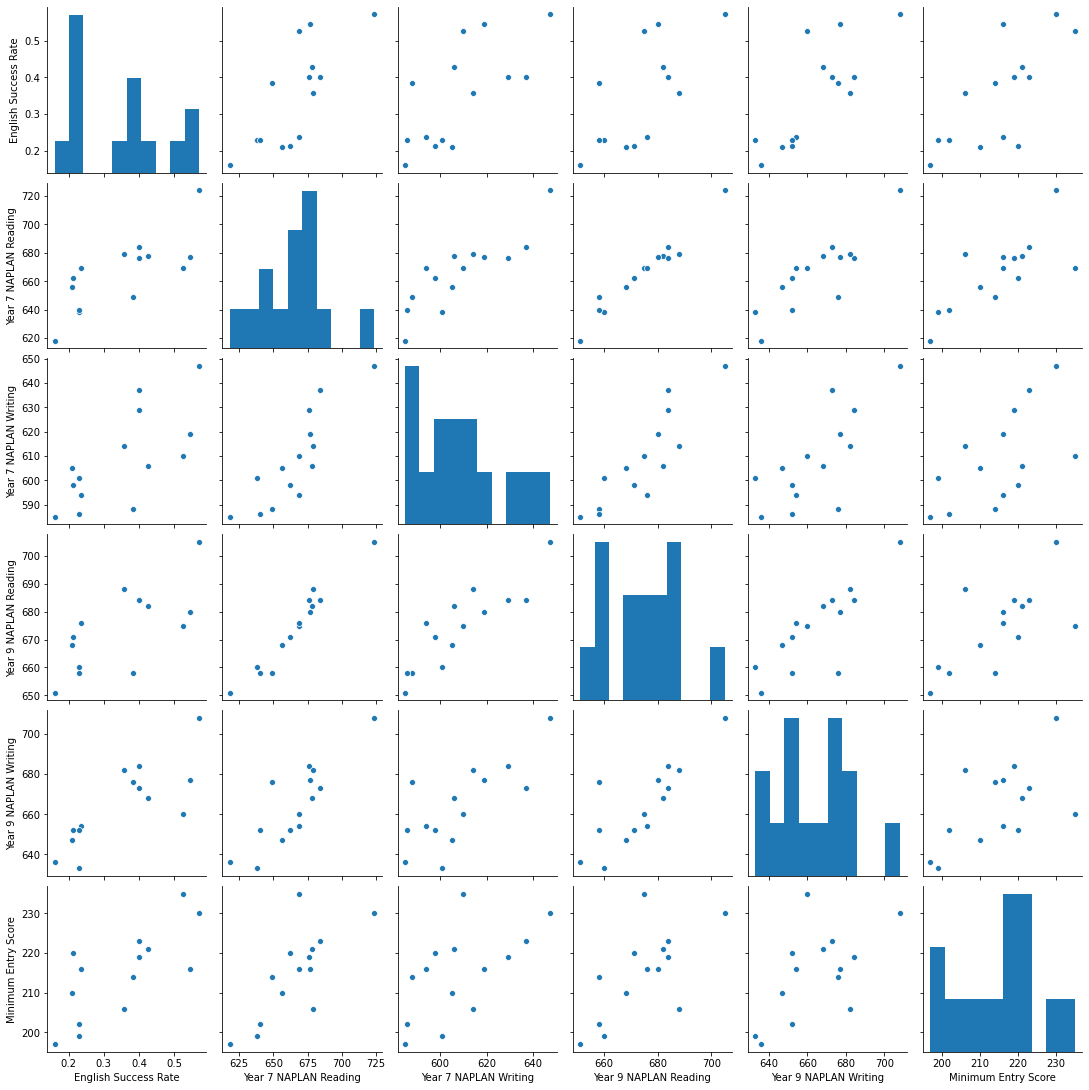

In [51]:
sns.pairplot(schools_data_2020)

In [52]:
from statsmodels.api import OLS

In [53]:
X = schools_data_2020.drop("English Success Rate", axis = 1)

In [54]:
y = schools_data_2020["English Success Rate"]

In [55]:
OLS(y,X, hasconst = True).fit().summary()

C:\Users\Mick4\Anaconda3\envs\data2\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     English Success Rate   R-squared:                       0.735
Model:                              OLS   Adj. R-squared:                  0.617
Method:                   Least Squares   F-statistic:                     6.246
Date:                  Tue, 29 Dec 2020   Prob (F-statistic):             0.0109
Time:                          12:03:35   Log-Likelihood:                 17.678
No. Observations:                    14   AIC:                            -25.36
Df Residuals:                         9   BIC:                            -22.16
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Year 7 NAPLAN Reading     0.0048      0.003      1.785      0.108      -0.001       0.011
Year 7 NAPLAN Writing     0.0026      0.003      1.001      0.343      -0.003       0.008
Year 9 NAPLAN Reading    -0.0111      0.003     -3.926      0.003      -0.017      -0.005
Year 9 NAPLAN Writing     0.0034      0.002      1.552      0.155      -0.002       0.008
Minimum Entry Score       0.0039      0.003      1.188      0.265      -0.004       0.011
==============================================================================
Omnibus:                        1.006   Durbin-Watson:                   1.018
Prob(Omnibus):                  0.605   Jarque-Bera (JB):                0.855
Skew:                           0.390   Prob(JB):                        0.652
Kurtosis:                       2.075   Cond. No.                         221.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
X2 = schools_data_2020.drop(["English Success Rate", "Year 7 NAPLAN Reading", "Year 7 NAPLAN Writing"], axis = 1)

In [59]:
OLS(y,X2, hasconst = True).fit().summary()

C:\Users\Mick4\Anaconda3\envs\data2\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     English Success Rate   R-squared:                       0.572
Model:                              OLS   Adj. R-squared:                  0.494
Method:                   Least Squares   F-statistic:                     7.337
Date:                  Tue, 29 Dec 2020   Prob (F-statistic):            0.00945
Time:                          12:07:15   Log-Likelihood:                 14.311
No. Observations:                    14   AIC:                            -22.62
Df Residuals:                        11   BIC:                            -20.70
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Year 9 NAPLAN Reading    -0.0070      0.002     -2.979      0.013      -0.012      -0.002
Year 9 NAPLAN Writing     0.0052      0.002      2.231      0.047    6.91e-05       0.010
Minimum Entry Score       0.0076      0.003      2.405      0.035       0.001       0.014
==============================================================================
Omnibus:                        0.825   Durbin-Watson:                   1.144
Prob(Omnibus):                  0.662   Jarque-Bera (JB):                0.646
Skew:                           0.048   Prob(JB):                        0.724
Kurtosis:                       1.952   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
schools_data_2020.to_csv("schools_co20_combined_cleaned.csv")

In [57]:
#Next: SuccessRate = b0 + b1 * Reading9 + b2 * Writing9 + School

In [ ]:
#Need to scrape Year 9 NAPLAN data for all years 

In [60]:
schools3 = ['James Ruse Agricultural High School',
           'Baulkham Hills High School',
           'North Sydney Boys High School',
           'Hornsby Girls High School',
           'North Sydney Girls High School',
           'Normanhurst Boys High School',
           'Sydney Boys High School',
           'Sydney Girls High School',
           'Girraween High School',
           'Fort Street High School',
           'Penrith High School',
           'Northern Beaches Secondary College Manly Campus',
           'Hurlstone Agricultural High School',
           'St George Girls High School',
           'Sydney Technical High School',
           'Abbotsleigh',
           'Sydney Grammar School',
           'Conservatorium High School',
           'Ascham School',
           'Pymble Ladies College',
            ]

In [ ]:
student_counts = pd.DataFrame(columns = ["School", "Year", "Students"])

for year in years:
    driver.get("https://bettereducation.com.au/Results/Hsc.aspx?yr=" + year)
    for school in schools2:
        search = driver.find_element_by_class_name("form-control")
        search.send_keys(school)
        search.send_keys(Keys.RETURN)
        table_trs = driver.find_elements_by_xpath('//div[@id="ctl00_ContentPlaceHolder1_GridView1_wrapper"]/table/tbody/tr')
        td = table_trs[0].find_elements_by_xpath(".//td")
        student_count = int(td[4].text)
        record = pd.DataFrame([[school, year, student_count]], columns = ["School", "Year", "Students"])
        #print(record)
        student_counts = student_counts.append(record, ignore_index=True)
        #print(student_counts)
        print(year, school, student_count)
        search.clear()